In [1]:
import torch
import numpy as np
import torch.nn.functional as F
from espnet2.tasks.asr import ASRTask
device = "cuda" if torch.cuda.is_available() else "cpu"
def get_ssl_weights(model_path):
    model, asr_train_args = ASRTask.build_model_from_file(
        None,
        model_path,
        device,
    )
    model.eval()
    if (
        model.frontend is not None
        and model.frontend.featurizer is not None
    ):
        weights = model.frontend.featurizer.weights
        norm_weights = F.softmax(weights, dim=-1)
        labels = range(len(norm_weights))
        sizes = norm_weights.detach().numpy() * 100
        sizes = sizes.tolist()
        return sizes, labels


/scratch/bbjs/chen26/espnet_01_23/tools/anaconda/envs/espnet_01_23/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
expdir = 'exp'
ssl_config = 'train_asr_s3prl_single'
track = '1h'

In [22]:
model2path = {
    'Chinese': f'{expdir}/asr_{ssl_config}_single_cmn_{track}/valid.loss.ave.pth',
    'German1': f'{expdir}/asr_{ssl_config}_single_deu1_{track}/valid.loss.ave.pth',
    'English1': f'{expdir}/asr_{ssl_config}_single_eng1_{track}/valid.loss.ave.pth',
    'French1': f'{expdir}/asr_{ssl_config}_single_fra1_{track}/valid.loss.ave.pth',
    'Japanese': f'{expdir}/asr_{ssl_config}_single_jpn_{track}/valid.loss.ave.pth',
    'Russian': f'{expdir}/asr_{ssl_config}_single_rus_{track}/valid.loss.ave.pth',
    'Swahili': f'{expdir}/asr_{ssl_config}_single_swa_{track}/valid.loss.ave.pth',
    'Swedish': f'{expdir}/asr_{ssl_config}_single_swe_{track}/valid.loss.ave.pth',
    'Mixtec': f'{expdir}/asr_{ssl_config}_single_xty_{track}/valid.loss.ave.pth',
}

In [23]:
models = []
sizes = []
labels = []
for model in model2path:
    path = model2path[model]
    size, label = get_ssl_weights(path)
    model_arr = [model for i in range(len(label))] 
    models += model_arr
    sizes += size
    labels += label

2023-02-23 21:17:36,735 (asr:466) INFO: Vocabulary size: 251
2023-02-23 21:17:36,737 (download:170) INFO: Requesting URL: https://huggingface.co/s3prl/converted_ckpts/resolve/main/xlsr2_300m.pt
2023-02-23 21:17:36,738 (_api:172) DEBUG: Attempting to acquire lock 139960120332640 on hub/e44d93b23b084a8fe33772983fa5c5be6b0cf05e0b6b1743d0c2b397e3c6b999.xlsr2_300m.pt.lock
2023-02-23 21:17:36,739 (_api:176) DEBUG: Lock 139960120332640 acquired on hub/e44d93b23b084a8fe33772983fa5c5be6b0cf05e0b6b1743d0c2b397e3c6b999.xlsr2_300m.pt.lock
2023-02-23 21:17:36,739 (_api:209) DEBUG: Attempting to release lock 139960120332640 on hub/e44d93b23b084a8fe33772983fa5c5be6b0cf05e0b6b1743d0c2b397e3c6b999.xlsr2_300m.pt.lock
2023-02-23 21:17:36,740 (_api:212) DEBUG: Lock 139960120332640 released on hub/e44d93b23b084a8fe33772983fa5c5be6b0cf05e0b6b1743d0c2b397e3c6b999.xlsr2_300m.pt.lock
2023-02-23 21:17:36,741 (download:181) INFO: Using URL's local file: hub/e44d93b23b084a8fe33772983fa5c5be6b0cf05e0b6b1743d0c2b39

In [5]:
import seaborn as sns
import pandas as pd

In [24]:
df = pd.DataFrame(data={'model': models, 'layer': labels, 'weight': sizes})

In [25]:
df = df.pivot('model', 'layer', 'weight')
df

/tmp/ipykernel_2837968/1052492352.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.pivot('model', 'layer', 'weight')


layer,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
model,,,,,,,,,,,,,,,,,,,,,
Chinese,3.760425,3.747227,3.743173,3.731878,3.760380,3.747163,3.750425,3.787584,4.165792,4.269263,...,4.281009,4.261710,4.289351,4.264730,4.189991,3.966511,3.834751,3.680117,3.672834,3.811701
English1,3.885133,3.880381,3.877639,3.875408,3.878401,3.864512,3.866108,3.860959,3.869602,3.886955,...,4.227775,4.231245,4.232072,4.217919,4.202437,4.002034,3.898142,3.859106,3.859522,3.910756
French1,3.838784,3.823025,3.820929,3.812671,3.803422,3.792540,3.796568,3.800414,3.840249,3.918480,...,4.273904,4.272284,4.280875,4.262559,4.210544,4.021359,3.887898,3.840749,3.814095,3.901802
German1,3.840069,3.820132,3.810181,3.803612,3.802382,3.775351,3.772207,3.758009,3.829415,3.931273,...,4.308298,4.317646,4.321293,4.300800,4.255183,4.044985,3.897757,3.819646,3.811651,3.887558
Japanese,3.839750,3.840980,3.839123,3.833965,3.846628,3.843704,3.849681,3.956946,4.114333,4.146405,...,4.154471,4.151309,4.157348,4.165686,4.086589,3.970603,3.898574,3.845060,3.857660,3.879589
Mixtec,3.924608,3.930045,3.940576,3.935646,3.957958,3.971504,3.988122,3.993984,4.018730,4.031193,...,4.072184,4.068462,4.064991,4.075239,4.030314,3.995862,3.971936,3.943823,3.932104,3.913813
Russian,3.834621,3.829308,3.829081,3.824407,3.831908,3.815242,3.804403,3.801142,3.962218,4.107405,...,4.223135,4.220913,4.228870,4.226488,4.186380,4.017345,3.907111,3.810762,3.792895,3.859425
Swahili,3.830935,3.825732,3.817538,3.813780,3.823766,3.803341,3.799989,3.820081,4.061362,4.166796,...,4.209238,4.203731,4.212520,4.191454,4.149867,3.990060,3.862749,3.790633,3.806851,3.863763
Swedish,3.814857,3.810884,3.804045,3.796160,3.804723,3.811690,3.817600,3.862944,4.040430,4.114189,...,4.217320,4.221140,4.218293,4.209712,4.123321,3.987351,3.893757,3.870363,3.868146,3.880399


2023-02-23 21:21:18,955 (colorbar:857) DEBUG: locator: <matplotlib.ticker.AutoLocator object at 0x7f4afbebaa30>


<AxesSubplot: xlabel='layer', ylabel='model'>

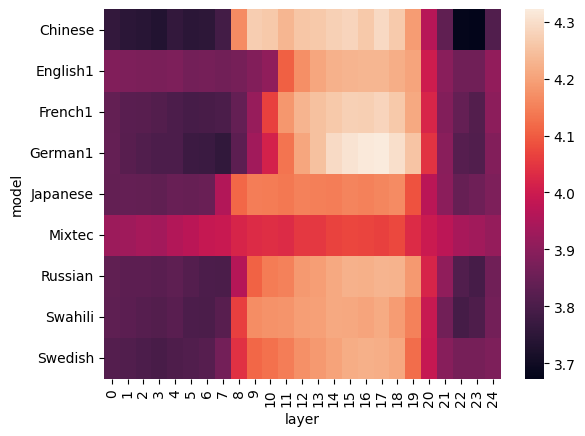

In [26]:
sns.heatmap(df)